In [ ]:
#!pip install spacy

In [ ]:
#!python -m spacy download en_core_web_md

In [ ]:
#!python -m spacy download en_core_web_md

In [1]:

import numpy as np   # linear algebra
import pandas as pd  # data processing ,CSV file I/O (e.g pd.read_csv)
import string        # special operations on strings
import spacy         # language models
from matplotlib import pyplot as plt
from wordcloud import wordcloud,STOPWORDS
import seaborn

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


# Problem Statment

Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

In [2]:
df=pd.read_csv('/content/Elon_musk.csv',encoding='cp1252')

In [3]:
df

Unnamed: 0                                               Text
0              1                             @kunalb11 I’m an alien
1              2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2              3                @joerogan @Spotify Great interview!
3              4                    @gtera27 Doge is underestimated
4              5  @teslacn Congratulations Tesla China for amazi...
...          ...                                                ...
1994        1995  @flcnhvy True, it sounds so surreal, but the n...
1995        1996  @PPathole Make sure to read ur terms &amp; con...
1996        1997                @TeslaGong @PPathole Samwise Gamgee
1997        1998  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998        1999                          Progress update August 28

[1999 rows x 2 columns]

In [4]:
#df.shape

In [5]:
#df.info()

In [6]:
#df.isnull()

In [7]:
df.drop(['Unnamed: 0'],axis = 1, inplace = True)
df.head()

Text
0                             @kunalb11 I’m an alien
1  @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                @joerogan @Spotify Great interview!
3                    @gtera27 Doge is underestimated
4  @teslacn Congratulations Tesla China for amazi...

In [8]:
#df.describe()

# text preprocessing

In [9]:
# remove both the leading and the trailing characters
df=[Text.strip() for Text in df.Text] # remove both the leading and the trailing characters
df=[Text for Text in df if Text] # removes empty strings, because they are considered in Python as False

In [10]:
df

['@kunalb11 I’m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It’s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',
 '@fr

In [11]:
len(df)

1999

In [12]:
# joining the list into one string/text
text=' '.join(df)
text

'@kunalb11 I’m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It’s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F

In [13]:
len(text)

158805

In [14]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True)
text_tokens=tknzr.tokenize(text)
print(text_tokens)

['I', '’', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', 'Great', 'interview', '!', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', '!', 'https://t.co/9WFKMYu2oj', 'Frodo', 'was', 'the', 'underdoge', ',', 'All', 'thought', 'he', 'would', 'fail', ',', 'Himself', 'most', 'of', 'all', '.', 'https://t.co/zGxJFDzzrM', 'Haha', 'thanks', ':)', 'Indeed', '!', 'Tweets', 'definitely', 'do', 'not', 'represent', 'real-world', 'time', 'allocation', '.', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'https://t.co/3rWE9uHSTS', 'It', '’', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', ',', 'so', 'he', 'can', 'be'

In [15]:
len(text_tokens)

21309

In [16]:
text_tokens_text=' '.join(text_tokens)
text_tokens_text

'I ’ m an alien Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? Great interview ! Doge is underestimated Congratulations Tesla China for amazing execution last year . Now on to the next for even more ! ! Happy New Year of the Ox ! https://t.co/9WFKMYu2oj Frodo was the underdoge , All thought he would fail , Himself most of all . https://t.co/zGxJFDzzrM Haha thanks :) Indeed ! Tweets definitely do not represent real-world time allocation . The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with https://t.co/3rWE9uHSTS It ’ s getting real Bought some Dogecoin for lil X , so he can be a toddler hodler He definitely has issues , but the sentencing seems a bit high Thanks for fixing Please unlock my account <U+0001F923> <U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O Any crypto wallet that won ’ t give you your private keys should be avoided at all costs Your app sucks RT : NASA has selected Falcon Heavy to launch th

In [17]:
no_punc_text = text_tokens_text.translate(str.maketrans('', '', string.punctuation))
no_punc_text

'I ’ m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox  httpstco9WFKMYu2oj Frodo was the underdoge  All thought he would fail  Himself most of all  httpstcozGxJFDzzrM Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with httpstco3rWE9uHSTS It ’ s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha httpstcoFc9uhQSd7O Any crypto wallet that won ’ t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway tog

In [18]:
# remove https or url within text
import re
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text

'I ’ m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox   Frodo was the underdoge  All thought he would fail  Himself most of all   Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with  It ’ s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha  Any crypto wallet that won ’ t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission   Yes Once we can predict cash flow reasonably well

In [19]:
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_url_text)
print(text_tokens)

LookupError: ignored

In [20]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
from nltk.corpus import stopwords
my_stop_words = stopwords.words('english')

sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words.extend(sw_list)

In [22]:
no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['’', 'alien', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'next-level', '.', 'Have', 'tried', '?', 'Great', 'interview', '!', 'Doge', 'underestimated', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'next', 'even', '!', '!', 'Happy', 'New', 'Year', 'Ox', '!', 'https://t.co/9WFKMYu2oj', 'Frodo', 'underdoge', ',', 'All', 'thought', 'would', 'fail', ',', 'Himself', '.', 'https://t.co/zGxJFDzzrM', 'Haha', 'thanks', ':)', 'Indeed', '!', 'Tweets', 'definitely', 'represent', 'real-world', 'time', 'allocation', '.', 'The', 'entertaining', 'outcome', 'likely', 'Just', 'sent', 'Just', 'agree', 'Clubhouse', 'https://t.co/3rWE9uHSTS', 'It', '’', 'getting', 'real', 'Bought', 'Dogecoin', 'lil', 'X', ',', 'toddler', 'hodler', 'He', 'definitely', 'issues', ',', 'sentencing', 'seems', 'bit', 'high', 'Thanks', 'fixing', 'Please', 'unlock', 'account', '<U+0001F923>', '<U+0001F923>', 'This', 'true', 'power', 'https://t.co/Fc9uhQSd7O', 'Any', 'crypto', 'wallet', '’', 'g

In [23]:
len(no_stop_tokens)

15304

# Normalize the data

In [24]:
lower_words = [Text.lower() for Text in no_stop_tokens]
print([lower_words[0:25]])

[['’', 'alien', 'ray', 'tracing', 'cyberpunk', 'hdr', 'next-level', '.', 'have', 'tried', '?', 'great', 'interview', '!', 'doge', 'underestimated', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', '.', 'now']]


# Stemming

In [25]:
# Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['’', 'alien', 'ray', 'trace', 'cyberpunk', 'hdr', 'next-level', '.', 'have', 'tri', '?', 'great', 'interview', '!', 'doge', 'underestim', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', '.', 'now', 'next', 'even', '!', '!', 'happi', 'new', 'year', 'ox', '!', 'https://t.co/9wfkmyu2oj', 'frodo', 'underdog', ',', 'all', 'thought']


In [26]:
!python -m spacy download en

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-02-02 08:55:27.708060: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 72.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [27]:
nlp = spacy.load('en_core_web_sm')

# Lematization

In [28]:
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

’ alien Ray tracing Cyberpunk HDR next-level . Have tried ? Great interview ! Doge underestimated Congratulations Tesla China amazing execution last year . Now next even ! ! Happy New Year Ox ! https://t.co/9WFKMYu2oj Frodo underdoge ,


In [29]:
lemmas = [token.lemma_ for token in doc]
lemmas

["'",
 'alien',
 'Ray',
 'trace',
 'Cyberpunk',
 'HDR',
 'next',
 '-',
 'level',
 '.',
 'have',
 'try',
 '?',
 'great',
 'interview',
 '!',
 'Doge',
 'underestimate',
 'Congratulations',
 'Tesla',
 'China',
 'amazing',
 'execution',
 'last',
 'year',
 '.',
 'now',
 'next',
 'even',
 '!',
 '!',
 'happy',
 'New',
 'Year',
 'Ox',
 '!',
 'https://t.co/9WFKMYu2oj',
 'Frodo',
 'underdoge',
 ',',
 'all',
 'thought',
 'would',
 'fail',
 ',',
 'himself',
 '.',
 'https://t.co/zGxJFDzzrM',
 'Haha',
 'thank',
 ':)',
 'indeed',
 '!',
 'tweet',
 'definitely',
 'represent',
 'real',
 '-',
 'world',
 'time',
 'allocation',
 '.',
 'the',
 'entertaining',
 'outcome',
 'likely',
 'just',
 'send',
 'just',
 'agree',
 'clubhouse',
 'https://t.co/3rwe9uhsts',
 'it',
 "'",
 'get',
 'real',
 'Bought',
 'Dogecoin',
 'lil',
 'X',
 ',',
 'toddler',
 'hodler',
 'he',
 'definitely',
 'issue',
 ',',
 'sentencing',
 'seem',
 'bit',
 'high',
 'thank',
 'fix',
 'please',
 'unlock',
 'account',
 '<',
 'u+0001f923',
 '>

In [30]:
clean_text=' '.join(lemmas)
clean_text

'\' alien Ray trace Cyberpunk HDR next - level . have try ? great interview ! Doge underestimate Congratulations Tesla China amazing execution last year . now next even ! ! happy New Year Ox ! https://t.co/9WFKMYu2oj Frodo underdoge , all thought would fail , himself . https://t.co/zGxJFDzzrM Haha thank :) indeed ! tweet definitely represent real - world time allocation . the entertaining outcome likely just send just agree clubhouse https://t.co/3rwe9uhsts it \' get real Bought Dogecoin lil X , toddler hodler he definitely issue , sentencing seem bit high thank fix please unlock account < u+0001f923 > < u+0001f923 > this true power https://t.co/fc9uhqsd7o any crypto wallet \' give private key avoid cost your app suck RT : NASA select Falcon Heavy launch first two element lunar gateway together one mission ! https://t.co/3pwt … once predict cash flow reasonably well , Starlink IPO Starlink staggeringly difficult technical & economic endeavor . however , … https://t.co/9Z8Ac6skqx SpaceX

In [31]:
len(lemmas)

16177

# Feature Extraction

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [33]:
X

<16177x4064 sparse matrix of type '<class 'numpy.int64'>'
	with 13242 stored elements in Compressed Sparse Row format>

In [34]:
vectorizer.vocabulary_

{'alien': 397,
 'ray': 2899,
 'trace': 3606,
 'cyberpunk': 1018,
 'hdr': 1712,
 'next': 2433,
 'level': 2113,
 'have': 1703,
 'try': 3636,
 'great': 1643,
 'interview': 1934,
 'doge': 1156,
 'underestimate': 3696,
 'congratulations': 921,
 'tesla': 3505,
 'china': 820,
 'amazing': 421,
 'execution': 1349,
 'last': 2072,
 'year': 4012,
 'now': 2466,
 'even': 1323,
 'happy': 1690,
 'new': 2431,
 'ox': 2586,
 'https': 1799,
 'co': 858,
 '9wfkmyu2oj': 293,
 'frodo': 1519,
 'underdoge': 3695,
 'all': 400,
 'thought': 3545,
 'would': 3953,
 'fail': 1389,
 'himself': 1755,
 'zgxjfdzzrm': 4047,
 'haha': 1677,
 'thank': 3517,
 'indeed': 1873,
 'tweet': 3653,
 'definitely': 1063,
 'represent': 2964,
 'real': 2909,
 'world': 3949,
 'time': 3561,
 'allocation': 402,
 'the': 3522,
 'entertaining': 1287,
 'outcome': 2564,
 'likely': 2132,
 'just': 1999,
 'send': 3122,
 'agree': 374,
 'clubhouse': 852,
 '3rwe9uhsts': 202,
 'it': 1956,
 'get': 1591,
 'bought': 674,
 'dogecoin': 1158,
 'lil': 2133,
 't

In [35]:
pd.DataFrame.from_records([vectorizer.vocabulary_])

alien   ray  trace  cyberpunk   hdr  next  level  have   try  great  ...  \
0    397  2899   3606       1018  1712  2433   2113  1703  3636   1643  ...   

   dire  priority  surreal  propaganda  social  wjrzibkh1h  click  samwise  \
0  1123      2776     3425        2807    3251        3936    844     3069   

   gamgee  altho  
0    1562    412  

[1 rows x 4064 columns]

In [36]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T

0
alien        397
ray         2899
trace       3606
cyberpunk   1018
hdr         1712
...          ...
wjrzibkh1h  3936
click        844
samwise     3069
gamgee      1562
altho        412

[4064 rows x 1 columns]

In [37]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(by = 0, ascending=False)

0
ðogecoin    4063
zynsxisp4n  4062
zyj8zddfql  4061
zyf8efd6ih  4060
zugaquvpy7  4059
...          ...
0001f1e9       4
0001f1e8       3
0001f1e7       2
0001f1e6       1
000            0

[4064 rows x 1 columns]

In [38]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(by = 0, ascending=True).head(20)

0
000        0
0001f1e6   1
0001f1e7   2
0001f1e8   3
0001f1e9   4
0001f1ea   5
0001f1f4   6
0001f1f8   7
0001f1fa   8
0001f30e   9
0001f338  10
0001f339  11
0001f353  12
0001f381  13
0001f3a9  14
0001f3af  15
0001f3b6  16
0001f3b7  17
0001f3dd  18
0001f409  19

In [39]:
vectorizer.get_feature_names()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['000',
 '0001f1e6',
 '0001f1e7',
 '0001f1e8',
 '0001f1e9',
 '0001f1ea',
 '0001f1f4',
 '0001f1f8',
 '0001f1fa',
 '0001f30e',
 '0001f338',
 '0001f339',
 '0001f353',
 '0001f381',
 '0001f3a9',
 '0001f3af',
 '0001f3b6',
 '0001f3b7',
 '0001f3dd',
 '0001f409',
 '0001f40d',
 '0001f410',
 '0001f43b',
 '0001f440',
 '0001f446',
 '0001f447',
 '0001f44c',
 '0001f44d',
 '0001f476',
 '0001f47b',
 '0001f484',
 '0001f495',
 '0001f4a8',
 '0001f4a9',
 '0001f4ab',
 '0001f4af',
 '0001f4b0',
 '0001f4b5',
 '0001f525',
 '0001f534',
 '0001f54a',
 '0001f5a4',
 '0001f600',
 '0001f603',
 '0001f608',
 '0001f609',
 '0001f60e',
 '0001f60f',
 '0001f610',
 '0001f622',
 '0001f62c',
 '0001f62e',
 '0001f634',
 '0001f680',
 '0001f6f0',
 '0001f914',
 '0001f917',
 '0001f918',
 '0001f920',
 '0001f923',
 '0001f9d9',
 '0001f9db',
 '0001fa82',
 '041a',
 '041e',
 '0430',
 '0431',
 '0432',
 '0434',
 '0435',
 '0438',
 '043a',
 '043b',
 '043c',
 '043d',
 '043e',
 '043f',
 '0440',
 '0441',
 '044b',
 '044c',
 '0451',
 '05',
 '07puor

In [40]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [41]:
print(X.toarray().shape)

(16177, 4064)


In [42]:
print(X.toarray()[50:150])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# Bigrams and trigrams

In [43]:
vectorizer_nigram_range = CountVectorizer(analyzer = 'word',
                                          ngram_range=(1,3),
                                          max_features=100) 
    
bow_matrix_ngram = vectorizer_nigram_range.fit_transform(lemmas)
bow_matrix_ngram

<16177x100 sparse matrix of type '<class 'numpy.int64'>'
	with 5280 stored elements in Compressed Sparse Row format>

In [44]:
print(vectorizer_nigram_range.get_feature_names())

['0001f923', 'actually', 'also', 'back', 'big', 'booster', 'car', 'co', 'come', 'complete', 'cool', 'could', 'crew', 'day', 'design', 'dragon', 'earth', 'engine', 'even', 'ever', 'exactly', 'falcon', 'fe0f', 'first', 'flight', 'fsd', 'future', 'get', 'go', 'good', 'great', 'haha', 'hard', 'high', 'https', 'https co', 'if', 'it', 'land', 'launch', 'life', 'like', 'long', 'look', 'lot', 'make', 'mars', 'maybe', 'mission', 'model', 'month', 'much', 'need', 'new', 'next', 'no', 'not', 'ok', 'one', 'people', 'point', 'pretty', 'probably', 'production', 'right', 'rocket', 'rt', 'seem', 'soon', 'space', 'spacex', 'starlink', 'starship', 'still', 'super', 'sure', 'take', 'tesla', 'test', 'thank', 'that', 'the', 'there', 'they', 'think', 'this', 'time', 'true', 'try', 'use', 'way', 'we', 'week', 'well', 'will', 'work', 'would', 'yeah', 'year', 'you']


In [45]:
print(bow_matrix_ngram.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# TF-IDF vectorizer

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",
                                                 analyzer='word', 
                                                 ngram_range=(1,3), 
                                                 max_features = 10) 

tf_idf_matrix_n_gram_max_features = vectorizer_n_gram_max_features.fit_transform(lemmas)
tf_idf_matrix_n_gram_max_features

<16177x10 sparse matrix of type '<class 'numpy.float64'>'
	with 2591 stored elements in Compressed Sparse Row format>

In [47]:
print(vectorizer_n_gram_max_features.get_feature_names())

['0001f923', 'co', 'great', 'https', 'https co', 'it', 'rt', 'tesla', 'the', 'we']


In [48]:
print(tf_idf_matrix_n_gram_max_features.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [49]:
pd.DataFrame(tf_idf_matrix_n_gram_max_features.toarray(),
             columns = vectorizer_n_gram_max_features.get_feature_names())

0001f923   co  great  https  https co   it   rt  tesla  the   we
0           0.0  0.0    0.0    0.0       0.0  0.0  0.0    0.0  0.0  0.0
1           0.0  0.0    0.0    0.0       0.0  0.0  0.0    0.0  0.0  0.0
2           0.0  0.0    0.0    0.0       0.0  0.0  0.0    0.0  0.0  0.0
3           0.0  0.0    0.0    0.0       0.0  0.0  0.0    0.0  0.0  0.0
4           0.0  0.0    0.0    0.0       0.0  0.0  0.0    0.0  0.0  0.0
...         ...  ...    ...    ...       ...  ...  ...    ...  ...  ...
16172       0.0  0.0    0.0    0.0       0.0  0.0  0.0    0.0  0.0  0.0
16173       0.0  0.0    0.0    0.0       0.0  0.0  0.0    0.0  0.0  0.0
16174       0.0  0.0    0.0    0.0       0.0  0.0  0.0    0.0  0.0  0.0
16175       0.0  0.0    0.0    0.0       0.0  0.0  0.0    0.0  0.0  0.0
16176       0.0  0.0    0.0    0.0       0.0  0.0  0.0    0.0  0.0  0.0

[16177 rows x 10 columns]

# Generate WordCloud

In [50]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
  
    # Set figure size
    plt.figure(figsize=(40, 30))

    # Display image
    plt.imshow(wordcloud) 
    
    # No axis details
    plt.axis("off");

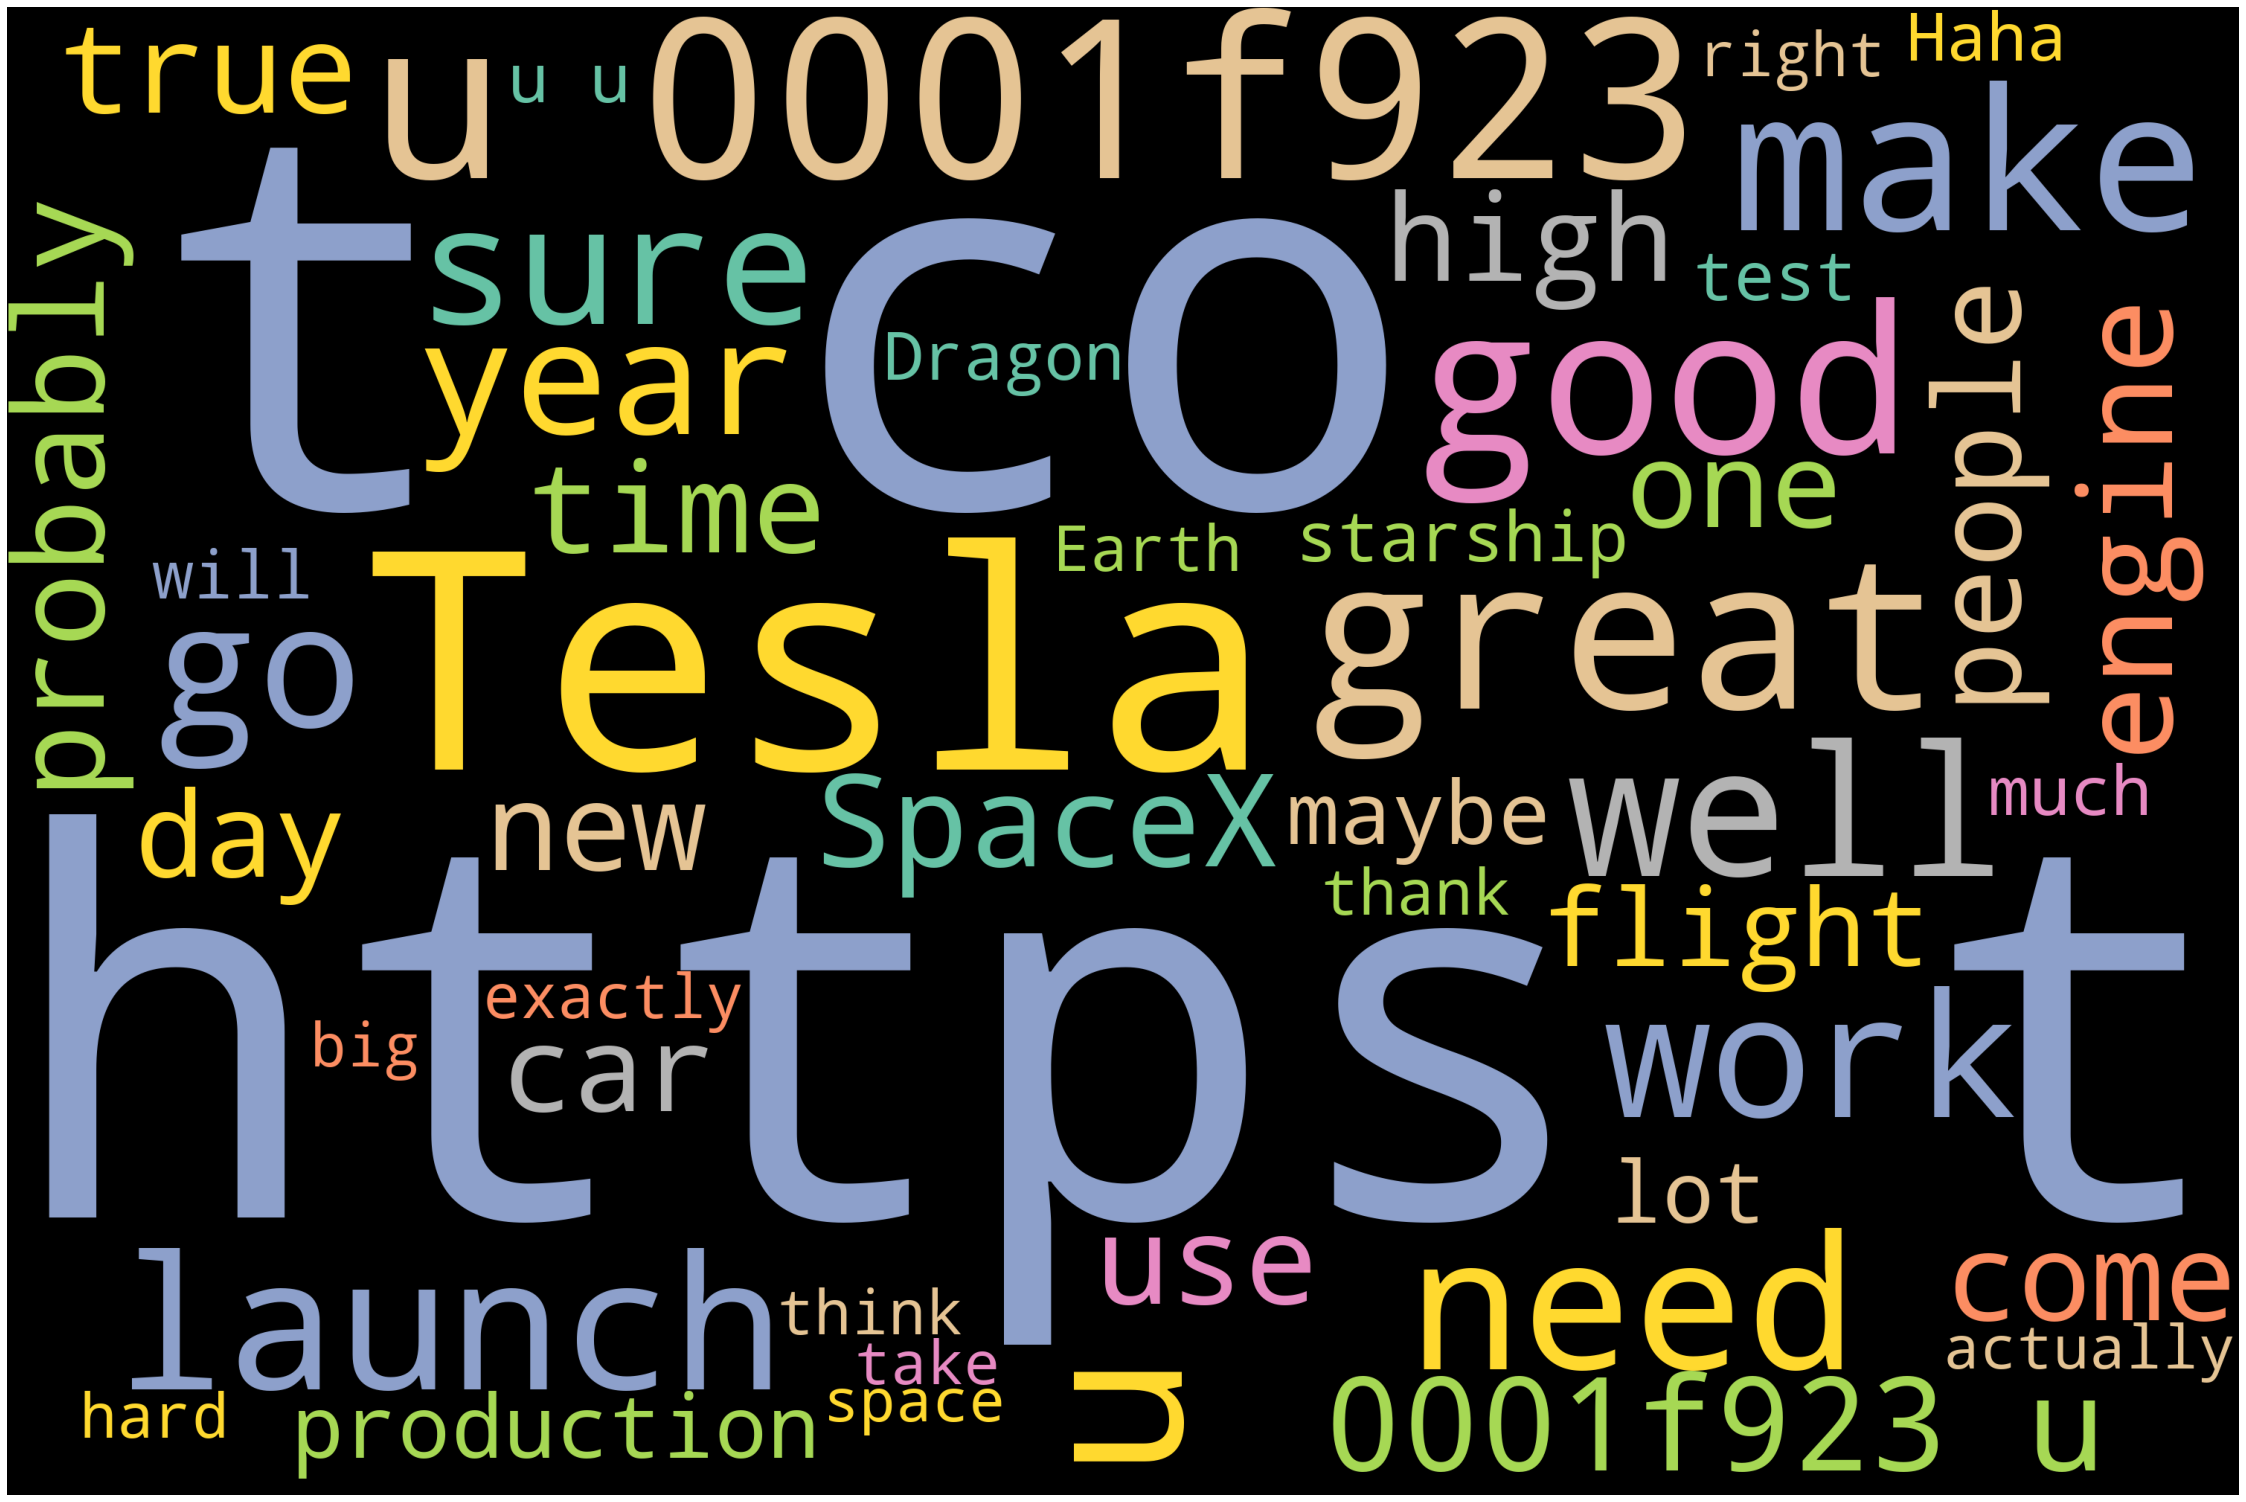

In [51]:
# Generate Word Cloud

from wordcloud import WordCloud
STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width=3000,
                    height=2000,
                    background_color='black',
                    max_words=50,
                   colormap='Set2',
                    stopwords=STOPWORDS).generate(clean_text)
plot_cloud(wordcloud)

# Named Entity Recogination

In [52]:
nlp = spacy.load('en_core_web_sm')
one_block = clean_text
one_block

'\' alien Ray trace Cyberpunk HDR next - level . have try ? great interview ! Doge underestimate Congratulations Tesla China amazing execution last year . now next even ! ! happy New Year Ox ! https://t.co/9WFKMYu2oj Frodo underdoge , all thought would fail , himself . https://t.co/zGxJFDzzrM Haha thank :) indeed ! tweet definitely represent real - world time allocation . the entertaining outcome likely just send just agree clubhouse https://t.co/3rwe9uhsts it \' get real Bought Dogecoin lil X , toddler hodler he definitely issue , sentencing seem bit high thank fix please unlock account < u+0001f923 > < u+0001f923 > this true power https://t.co/fc9uhqsd7o any crypto wallet \' give private key avoid cost your app suck RT : NASA select Falcon Heavy launch first two element lunar gateway together one mission ! https://t.co/3pwt … once predict cash flow reasonably well , Starlink IPO Starlink staggeringly difficult technical & economic endeavor . however , … https://t.co/9Z8Ac6skqx SpaceX

In [53]:
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style = 'ent', jupyter = True)

In [54]:
#POS Tagging
for token in doc_block[:]:
  print(token, token.pos_)

Streaming output truncated to the last 5000 lines.
tbh NOUN
https://t.co/ovaohsg1of PROPN
if SCONJ
ever ADV
want VERB
build VERB
long ADJ
accelerator NOUN
tunnel NOUN
, PUNCT
straight ADV
circular ADJ
, PUNCT
know VERB
people NOUN
… PUNCT
RT PROPN
: PUNCT
after ADP
launch NOUN
SAOCOM PROPN
1b NUM
two NUM
rideshare PROPN
payload NOUN
orbit NOUN
, PUNCT
Falcon PROPN
9 NUM
' PART
first ADJ
stage NOUN
return NOUN
Earth PROPN
land NOUN
land NOUN
Zon PROPN
… PUNCT
RT PROPN
: PUNCT
Deployment PROPN
SAOCOM PROPN
1b PROPN
confirm VERB
https://t.co/gqtxqmpy48 PROPN
RT PROPN
: PUNCT
Falcon PROPN
9 NUM
' PART
first ADJ
stage NOUN
land NOUN
Landing VERB
Zone PROPN
1 NUM
https://t.co/0y5FkVqPk8 PROPN
RT PROPN
: PUNCT
Liftoff PROPN
! PUNCT
https://t.co/aiwrmzb3d1 PROPN
Cool PROPN
RT PROPN
: PUNCT
Snout PROPN
Boops PROPN
https://t.co/zjogq2ulvf ADP
Physics PROPN
law NOUN
, PUNCT
everything PRON
else ADV
recommendation NOUN
if SCONJ
company NOUN
solve VERB
useful ADJ
thing NOUN
buy VERB
, PUNCT
would A

In [55]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]

nouns_verbs

['trace',
 'level',
 'try',
 'interview',
 'underestimate',
 'execution',
 'year',
 'https://t.co/9WFKMYu2oj',
 'thought',
 'fail',
 'thank',
 'represent',
 'world',
 'time',
 'allocation',
 'outcome',
 'send',
 'agree',
 'clubhouse',
 'https://t.co/3rwe9uhsts',
 'get',
 'toddler',
 'hodler',
 'issue',
 'sentencing',
 'seem',
 'thank',
 'fix',
 'unlock',
 'account',
 'power',
 'crypto',
 'wallet',
 'give',
 'avoid',
 'cost',
 'app',
 'suck',
 'select',
 'launch',
 'gateway',
 'mission',
 'predict',
 'cash',
 'flow',
 'endeavor',
 'pass',
 'chasm',
 'cash',
 'flow',
 'year',
 'https://t.co/7j1c92hdjl',
 'cost',
 'ton',
 'carbon',
 'sequester',
 'value',
 'product',
 'make',
 'scalable',
 'g',
 "'",
 'mean',
 'price',
 'country',
 'difference',
 'taxis',
 'shipping',
 'intend',
 'earth',
 'idea',
 'apply',
 'team',
 'manage',
 'carbon',
 'capture',
 'https://t.co/fSw5IanL0r',
 'receive',
 'stock',
 'comp',
 'stock',
 'option',
 'take',
 'table',
 'miss',
 'work',
 'go',
 'seem',
 'bit',


In [56]:
len(nouns_verbs)

5379

In [57]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
X

<5379x1959 sparse matrix of type '<class 'numpy.int64'>'
	with 5684 stored elements in Compressed Sparse Row format>

In [58]:
X.shape

(5379, 1959)

In [59]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [60]:
temp_df = pd.DataFrame(X.toarray(), columns = cv.get_feature_names())
temp_df

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


0001f1e8  0001f1ea  0001f3a9  0001f3af  0001f3b6  0001f3b7  0001f40d  \
0            0         0         0         0         0         0         0   
1            0         0         0         0         0         0         0   
2            0         0         0         0         0         0         0   
3            0         0         0         0         0         0         0   
4            0         0         0         0         0         0         0   
...        ...       ...       ...       ...       ...       ...       ...   
5374         0         0         0         0         0         0         0   
5375         0         0         0         0         0         0         0   
5376         0         0         0         0         0         0         0   
5377         0         0         0         0         0         0         0   
5378         0         0         0         0         0         0         0   

      0001f410  0001f440  0001f4a9  ...  ynetmywfvg  yo  yup  yzcixdgm38  \
0            0         0         0  ...           0   0    0           0   
1            0         0         0  ...           0   0    0           0   
2            0         0         0  ...           0   0    0           0   
3            0         0         0  ...           0   0    0           0   
4            0         0         0  ...           0   0    0           0   
...        ...       ...       ...  ...         ...  ..  ...         ...   
5374         0         0         0  ...           0   0    0           0   
5375         0         0         0  ...           0   0    0           0   
5376         0         0         0  ...           0   0    0           0   
5377         0         0         0  ...           0   0    0           0   
5378         0         0         0  ...           0   0    0           0   

      yztdfzlull  z9kxjt9umj  zcnw4z3nxh  zhqxmco6gy  zk1vr9xwzl  zo01qsu1wt  
0              0           0           0           0           0           0  
1              0           0           0           0           0           0  
2              0           0           0           0           0           0  
3              0           0           0           0           0           0  
4              0           0           0           0           0           0  
...          ...         ...         ...         ...         ...         ...  
5374           0           0           0           0           0           0  
5375           0           0           0           0           0           0  
5376           0           0           0           0           0           0  
5377           0           0           0           0           0           0  
5378           0           0           0           0           0           0  

[5379 rows x 1959 columns]

In [61]:
cv.vocabulary_

{'trace': 1771,
 'level': 990,
 'try': 1795,
 'interview': 915,
 'underestimate': 1820,
 'execution': 636,
 'year': 1947,
 'https': 855,
 'co': 358,
 '9wfkmyu2oj': 67,
 'thought': 1737,
 'fail': 658,
 'thank': 1728,
 'represent': 1424,
 'world': 1926,
 'time': 1745,
 'allocation': 123,
 'outcome': 1195,
 'send': 1522,
 'agree': 113,
 'clubhouse': 355,
 '3rwe9uhsts': 43,
 'get': 753,
 'toddler': 1754,
 'hodler': 831,
 'issue': 927,
 'sentencing': 1526,
 'seem': 1518,
 'fix': 695,
 'unlock': 1828,
 'account': 85,
 'power': 1307,
 'crypto': 454,
 'wallet': 1876,
 'give': 757,
 'avoid': 198,
 'cost': 432,
 'app': 146,
 'suck': 1665,
 'select': 1519,
 'launch': 975,
 'gateway': 746,
 'mission': 1102,
 'predict': 1314,
 'cash': 309,
 'flow': 704,
 'endeavor': 607,
 'pass': 1229,
 'chasm': 331,
 '7j1c92hdjl': 60,
 'ton': 1757,
 'carbon': 301,
 'sequester': 1531,
 'value': 1848,
 'product': 1337,
 'make': 1042,
 'scalable': 1498,
 'mean': 1070,
 'price': 1323,
 'country': 435,
 'difference': 5

In [62]:
sum_words = X.sum(axis = 0) #column total
sum_words

matrix([[1, 3, 1, ..., 1, 1, 1]])

In [63]:
type(sum_words)

numpy.matrix

In [64]:
sorted(cv.vocabulary_)

['0001f1e8',
 '0001f1ea',
 '0001f3a9',
 '0001f3af',
 '0001f3b6',
 '0001f3b7',
 '0001f40d',
 '0001f410',
 '0001f440',
 '0001f4a9',
 '0001f4ab',
 '0001f4af',
 '0001f525',
 '0001f534',
 '0001f5a4',
 '0001f914',
 '0001f917',
 '095whx44bx',
 '0kaav0dtnn',
 '0rc72s0zay',
 '10x',
 '19h4u8ta2a',
 '1dvhg0ntku',
 '1mqxfakpzf',
 '1oltpnw929',
 '1st',
 '20k',
 '2192',
 '21st',
 '25k',
 '26a1',
 '2705',
 '28th',
 '2k8psyqu4j',
 '2v',
 '2wyticewfr',
 '2zlkc8fc2d',
 '326rkueyw8',
 '34o80p1hi6',
 '38fzby8pno',
 '39a',
 '3dhapzhixh',
 '3i0bwgjlqp',
 '3rwe9uhsts',
 '46j2gccjp0',
 '4aq1a5cykh',
 '4uh4rarc6',
 '5elyx8pjlg',
 '5lliqzacuu',
 '5lplhqgazw',
 '5t9vgklwda',
 '5u3fnqfhr1',
 '6cetazsxco',
 '6gwwllixdg',
 '6ojfysuaxo',
 '6qghblfrk8',
 '6vz4xnohf9',
 '79jvi22n2r',
 '7elp9pf9sl',
 '7hkza1ohe4',
 '7j1c92hdjl',
 '8ehbqc3fa0',
 '8zbt9qjd9h',
 '941a2odu5h',
 '9bgkez9d8a',
 '9cbjmeaavw',
 '9sschdkfad',
 '9wfkmyu2oj',
 '9ybabezxcv',
 'a6kmk0pegm',
 'aayypcpp1i',
 'abo',
 'abort',
 'absence',
 'absorb',
 '

In [65]:
wf_df = pd.DataFrame({'word':cv.get_feature_names_out(),
                      'count':np.array(sum_words).flatten()}) 
wf_df

word  count
0       0001f1e8      1
1       0001f1ea      3
2       0001f3a9      1
3       0001f3af      1
4       0001f3b6      1
...          ...    ...
1954  z9kxjt9umj      1
1955  zcnw4z3nxh      1
1956  zhqxmco6gy      1
1957  zk1vr9xwzl      1
1958  zo01qsu1wt      1

[1959 rows x 2 columns]

In [66]:
wf_df.sort_values(by = 'count',
                  ascending=False,
                  inplace = True,
                  ignore_index = True)
wf_df

word  count
0          https    197
1             co    196
2           make     64
3         launch     58
4           year     49
...          ...    ...
1954   happiness      1
1955     happens      1
1956     hanging      1
1957      hangar      1
1958  zo01qsu1wt      1

[1959 rows x 2 columns]

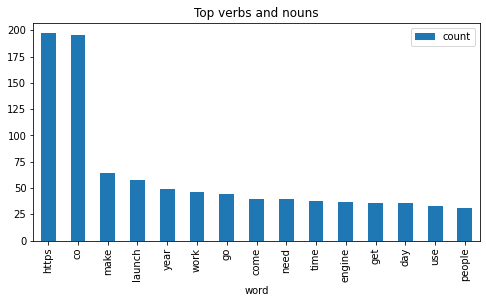

In [67]:
wf_df[0:15].plot.bar(x='word', figsize = (8,4), title = 'Top verbs and nouns')

Emotion Mining

In [74]:
afinn = pd.read_csv('/content/Afinn.csv',error_bad_lines = False, sep = ",",encoding = 'latin-1')
afinn

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


word  value
0       abandon     -2
1     abandoned     -2
2      abandons     -2
3      abducted     -2
4     abduction     -2
...         ...    ...
2472      yucky     -2
2473      yummy      3
2474     zealot     -2
2475    zealots     -2
2476    zealous      2

[2477 rows x 2 columns]

In [75]:
afinn[1500:]

word  value
1500  masterpieces      4
1501        matter      1
1502       matters      1
1503        mature      2
1504    meaningful      2
...            ...    ...
2472         yucky     -2
2473         yummy      3
2474        zealot     -2
2475       zealots     -2
2476       zealous      2

[977 rows x 2 columns]

In [76]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [77]:
from nltk import tokenize

sentences = tokenize.sent_tokenize(" ".join(df))

sentences

['@kunalb11 I’m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It’s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my acc

In [78]:
sent_df = pd.DataFrame(sentences, columns = ['sentence'])
sent_df

sentence
0    @kunalb11 I’m an alien @ID_AA_Carmack Ray trac...
1                                   Have you tried it?
2                  @joerogan @Spotify Great interview!
3    @gtera27 Doge is underestimated @teslacn Congr...
4                   Now on to the next for even more!!
..                                                 ...
909  @kenyanwalstreet Not actually a payout, just a...
910  It may never pay out, as the stock can’t b… ht...
911                                    Details Aug 28.
912  AI symbiosis while u wait @vistacruiser7 @flcn...
913  @TeslaGong @PPathole Samwise Gamgee @PPathole ...

[914 rows x 1 columns]

In [79]:
affinity_scores = afinn.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [80]:
nlp = spacy.load('en_core_web_sm')

In [81]:
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
  sent_score = 0
  if text:
    sentence = nlp(text)
    #print(sentence)
    for word in sentence:
      sent_score += sentiment_lexicon.get(word.lemma_, 0) #return 0 if key not found
  return sent_score

In [82]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [83]:
sent_df

sentence  sentiment_value
0    @kunalb11 I’m an alien @ID_AA_Carmack Ray trac...                0
1                                   Have you tried it?                0
2                  @joerogan @Spotify Great interview!                3
3    @gtera27 Doge is underestimated @teslacn Congr...                3
4                   Now on to the next for even more!!                0
..                                                 ...              ...
909  @kenyanwalstreet Not actually a payout, just a...                0
910  It may never pay out, as the stock can’t b… ht...               -4
911                                    Details Aug 28.                0
912  AI symbiosis while u wait @vistacruiser7 @flcn...               -2
913  @TeslaGong @PPathole Samwise Gamgee @PPathole ...                0

[914 rows x 2 columns]

In [84]:
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df

sentence  sentiment_value  \
0    @kunalb11 I’m an alien @ID_AA_Carmack Ray trac...                0   
1                                   Have you tried it?                0   
2                  @joerogan @Spotify Great interview!                3   
3    @gtera27 Doge is underestimated @teslacn Congr...                3   
4                   Now on to the next for even more!!                0   
..                                                 ...              ...   
909  @kenyanwalstreet Not actually a payout, just a...                0   
910  It may never pay out, as the stock can’t b… ht...               -4   
911                                    Details Aug 28.                0   
912  AI symbiosis while u wait @vistacruiser7 @flcn...               -2   
913  @TeslaGong @PPathole Samwise Gamgee @PPathole ...                0   

     word_count  
0            13  
1             4  
2             4  
3            13  
4             8  
..          ...  
909          11  
910          31  
911           3  
912          47  
913          15  

[914 rows x 3 columns]

In [85]:
sent_df.sort_values(by='sentiment_value').head()

sentence  sentiment_value  \
640  Very ba… https://t.co/tJsh1Exz1Q @justpaulinel...               -8   
64   Also, the road to hell is mostly paved with ba...               -7   
828  Cool Model 3 review by @iamjamiefoxx https://t...               -6   
473  He plays the “poor inventor” card, but was ric...               -5   
604  Then static fire, checkouts, static fire, fly ...               -4   

     word_count  
640          60  
64           11  
828          61  
473          34  
604          12

In [86]:
sent_df.sort_values(by='sentiment_value').tail()

sentence  sentiment_value  \
638  It’s… https://t.co/IxhyT6NuiC @Teslarati Tesla...               13   
578  The “open” areas… https://t.co/rabjKrtQlw @Sav...               14   
36   @ajtourville @Erdayastronaut @SpaceX Yes, but ...               15   
710  We just haven’t observed the… https://t.co/mez...               15   
104  @Erdayastronaut @SpaceX Was also thinking that...               16   

     word_count  
638          65  
578         138  
36          231  
710          72  
104          94

In [87]:
sent_df['sentiment_value'].describe()

count    914.000000
mean       1.380744
std        2.694667
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       16.000000
Name: sentiment_value, dtype: float64

In [88]:
sent_df[sent_df['sentiment_value']<=0].head()

sentence  sentiment_value  \
0  @kunalb11 I’m an alien @ID_AA_Carmack Ray trac...                0   
1                                 Have you tried it?                0   
4                 Now on to the next for even more!!                0   
5                          Happy New Year of the Ox!                0   
6  https://t.co/9WFKMYu2oj Frodo was the underdog...               -2   

   word_count  
0          13  
1           4  
4           8  
5           6  
6          14

In [89]:
sent_df[sent_df['sentiment_value']<-5].head()['sentence']

64     Also, the road to hell is mostly paved with ba...
640    Very ba… https://t.co/tJsh1Exz1Q @justpaulinel...
828    Cool Model 3 review by @iamjamiefoxx https://t...
Name: sentence, dtype: object

In [90]:
sent_df[sent_df['sentiment_value']<-5].head()['sentence'].tolist()

['Also, the road to hell is mostly paved with bad intentions.',
 'Very ba… https://t.co/tJsh1Exz1Q @justpaulinelol It’s too embarrassing Just learned that my physics prof from Penn is head of Fermilab &amp; still has some of my old homework <U+263A><U+FE0F> @ruskin147 It is unfortunately common for many in academia to overweight the value of ideas &amp; underweight bringing… https://t.co/OFFoojCqNv @l_vaux @kulpability @tlowdon @EthicalSkeptic People are extremely unlikely to die of Covid/sars-cov2 alone.',
 'Cool Model 3 review by @iamjamiefoxx https://t.co/hJDD7BjkE3 @teslacn Tesla will add a power lift gate at no cost @HansNoordsij Agreed, hydrogen fool sells make no sense Pronouns suck @historyofarmani Also, we get our lithium from Australia @nichegamer <U+0001F923><U+0001F923> @akinfermo Yeah, would have been way better just to send everyone $6k I bet no one on <U+0001F339> Twitter even *has* a guillotine!']

In [91]:
sent_df['index'] = range(0, len(sent_df))

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


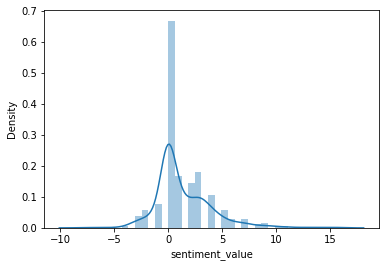

In [93]:
import seaborn as sns
sns.distplot(sent_df['sentiment_value'])

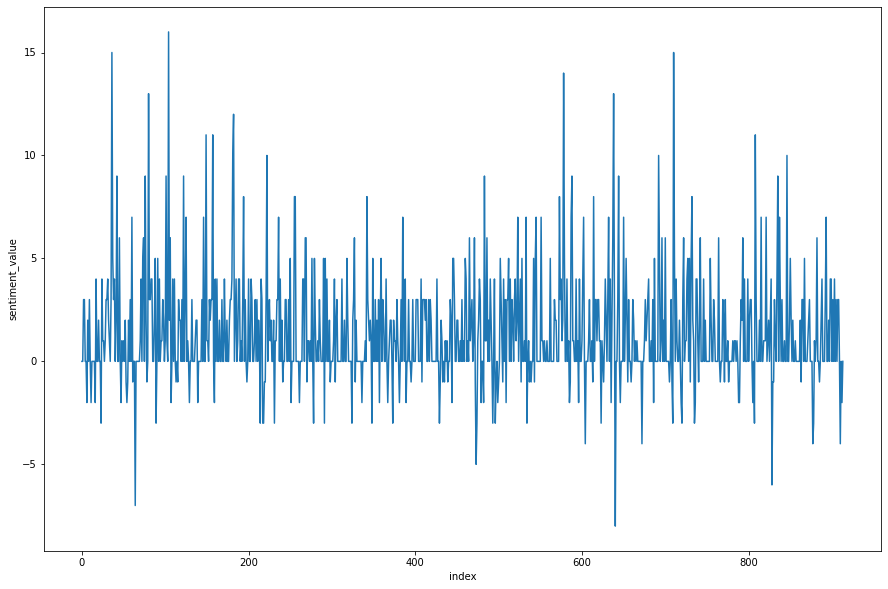

In [94]:
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

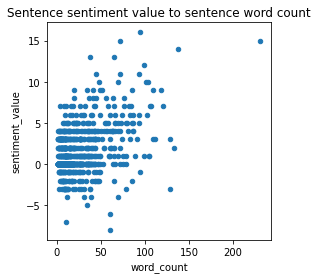

In [95]:
sent_df.plot.scatter(x='word_count',
                     y='sentiment_value',
                     figsize=(4,4),
                     title='Sentence sentiment value to sentence word count')

# Sentimental Analysis 

Sentiment analysis on a single tweet Before we use VADER on all the tweets lets try it on the first one.

Explanation of the score

The 'pos' (positive), 'neu' (neutral), and 'neg' (negative) scores are ratios for proportions of text that fall in each category. Together they should add up to one (or very close to it).
What is compound?

The compound score is computed by summing the scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive)

# Positive word cloud

In [96]:
# postive words  Choose path for -ve words stored in system
with open("/content/positive-words.txt","r") as pos:
  pos_words = pos.read().split("\n")
  print(pos_words)

[';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;', '; ', '; Opinion Lexicon: Positive', ';', '; This file contains a list of POSITIVE opinion words (or sentiment words).', ';', '; This file and the papers can all be downloaded from ', ';    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html', ';', '; If you use this list, please cite one of the following two papers:', ';', ';   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." ', ';       Proceedings of the ACM SIGKDD International Conference on Knowledge ', ';       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, ', ';       Washington, USA, ', ';   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing ', ';       and Comparing Opinions on the Web." Proceedings of the 14th ', ';       International World Wide Web conference (WWW-2005), May 10-14, ', ';       2005, Chiba, Japan.', ';', '; Notes: ', ';    1. The appearance of an opinion word in a senten

In [97]:
len(pos_words)

2042

In [98]:
in_pos_words = [word for word in lemmas if word in pos_words]
print(in_pos_words[0:40])

['great', 'amazing', 'happy', 'thank', 'entertaining', 'thank', 'reasonably', 'well', 'prize', 'work', 'wow', 'enough', 'improve', 'work', 'cute', 'fun', 'genius', 'easy', 'work', 'great', 'great', 'wow', 'clear', 'hot', 'good', 'masterpiece', 'welcome', 'entertaining', 'tough', 'progress', 'work', 'super', 'work', 'advanced', 'skill', 'helping', 'good', 'work', 'great', 'correct']


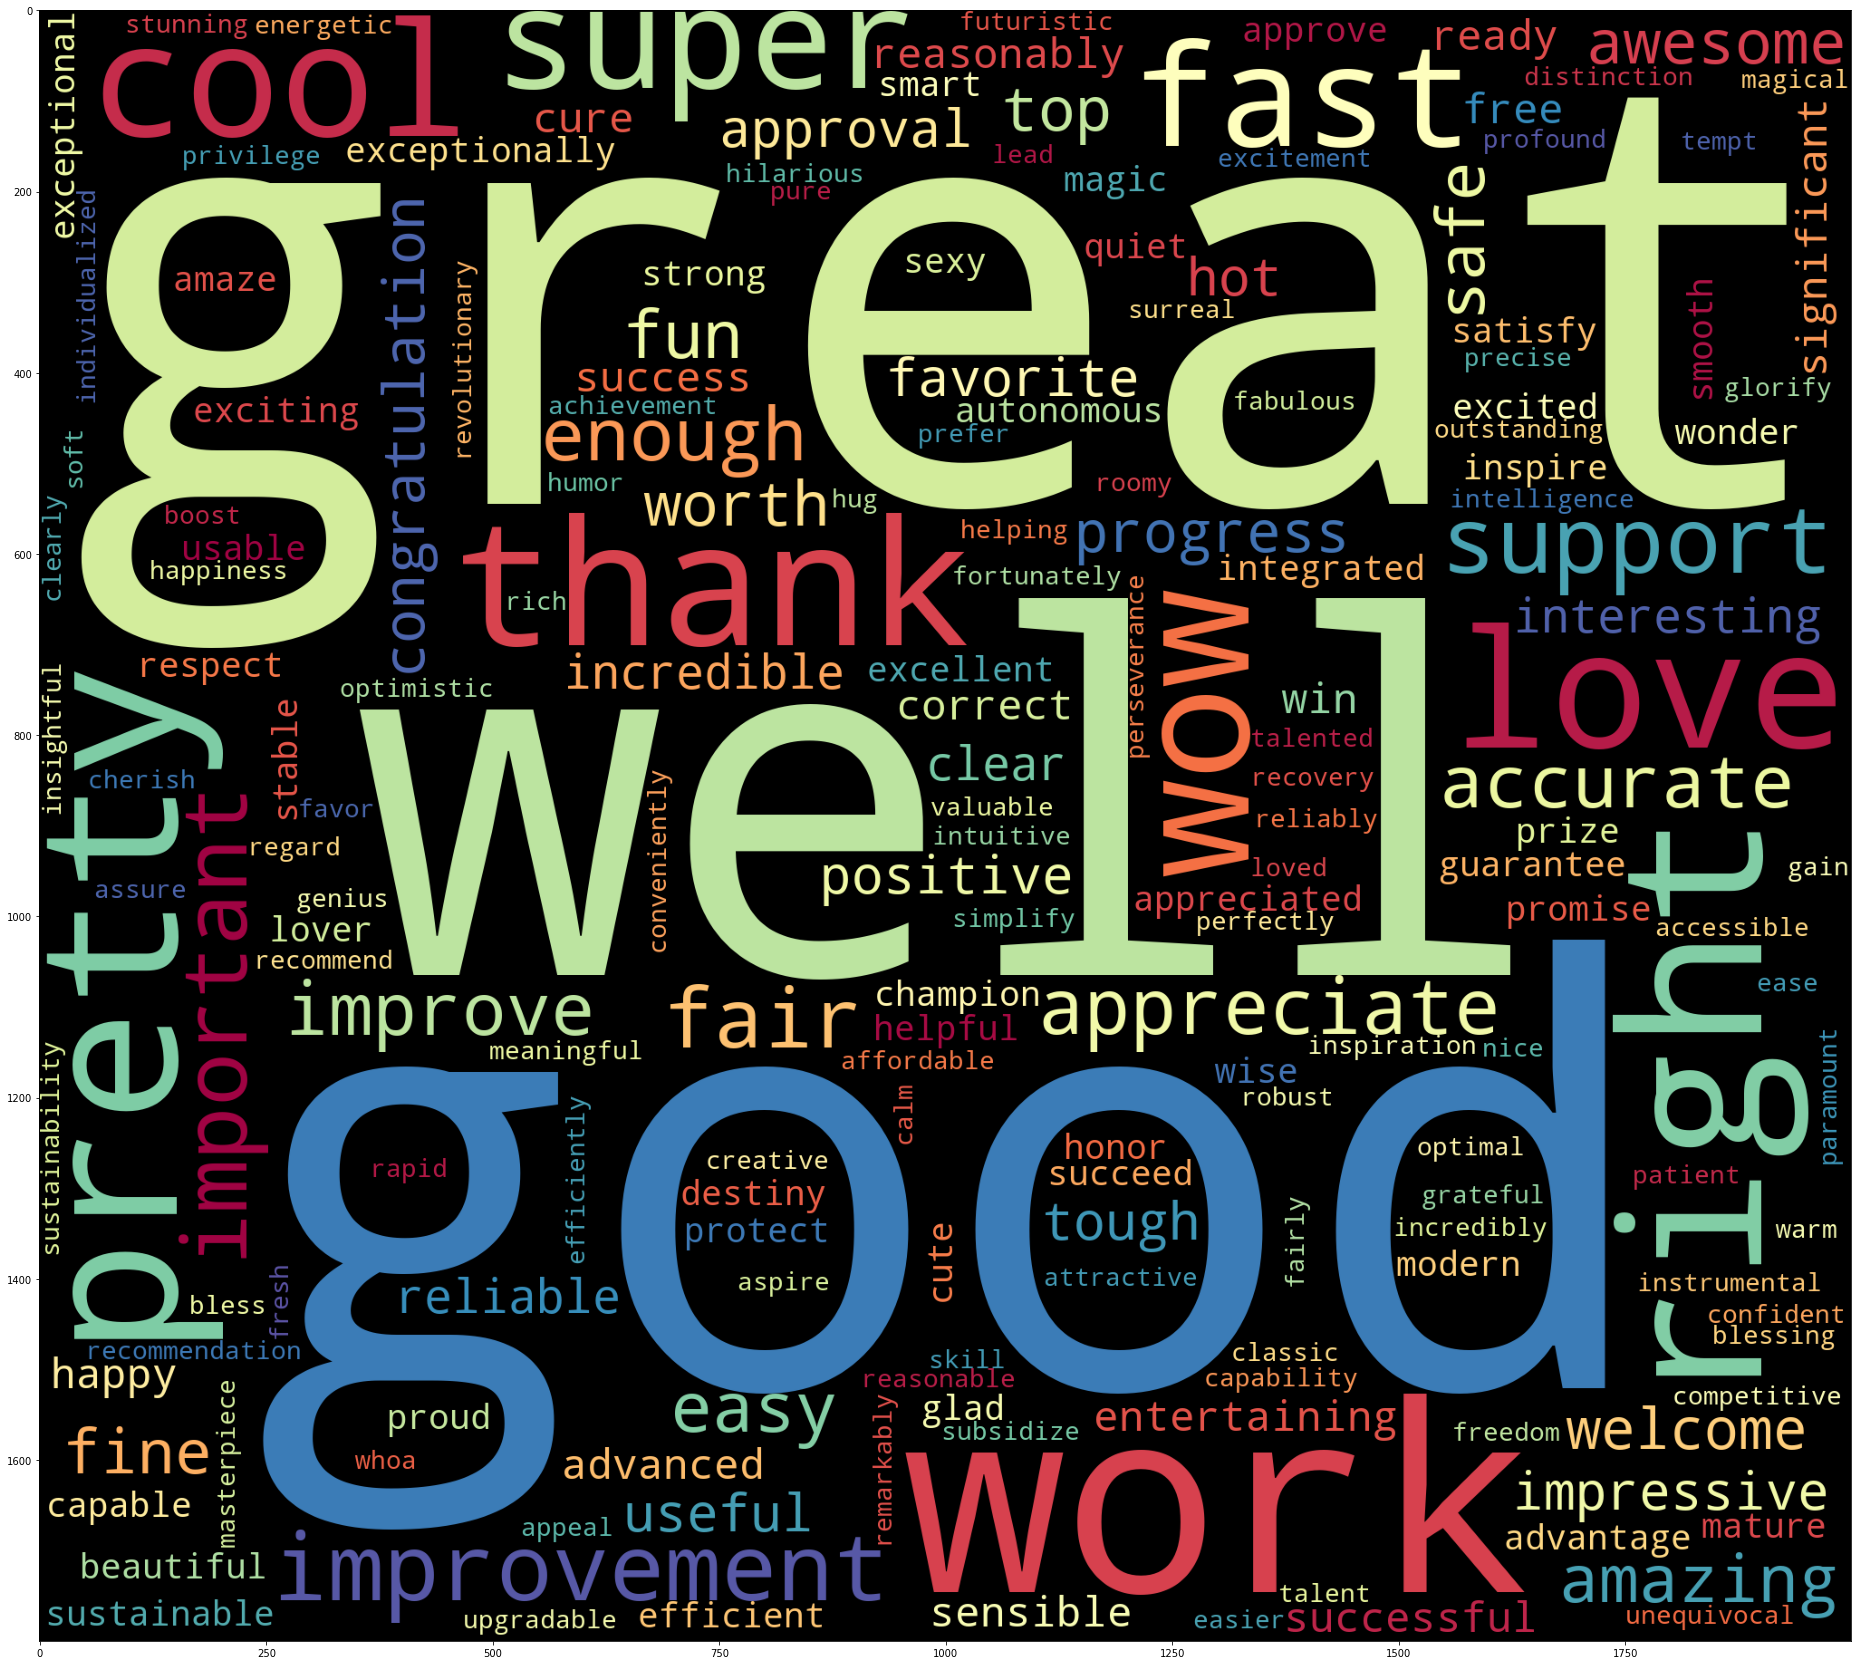

In [99]:
# Positive word cloud
# Choosing the only words which are present in positive words
pos_word_string = " ".join (in_pos_words)

plt.figure(figsize=(40,30))
wordcloud_pos = WordCloud(
                      background_color='black',
                       colormap='Spectral',
                      width=2000,
                      height=1800
                     ).generate(pos_word_string)
plt.imshow(wordcloud_pos)
plt.show()

In [100]:
len(pos_word_string)

5866

# Negative Words

In [ ]:
with open("/content/negative-words.txt", "r", encoding="ISO-8859-1") as neg:
    neg_words = neg.read()
    print(neg_words)


In [ ]:
len(neg_words)

In [ ]:
in_neg_words = [word for word in lemmas if word in neg_words]
print(in_neg_words[0:40])

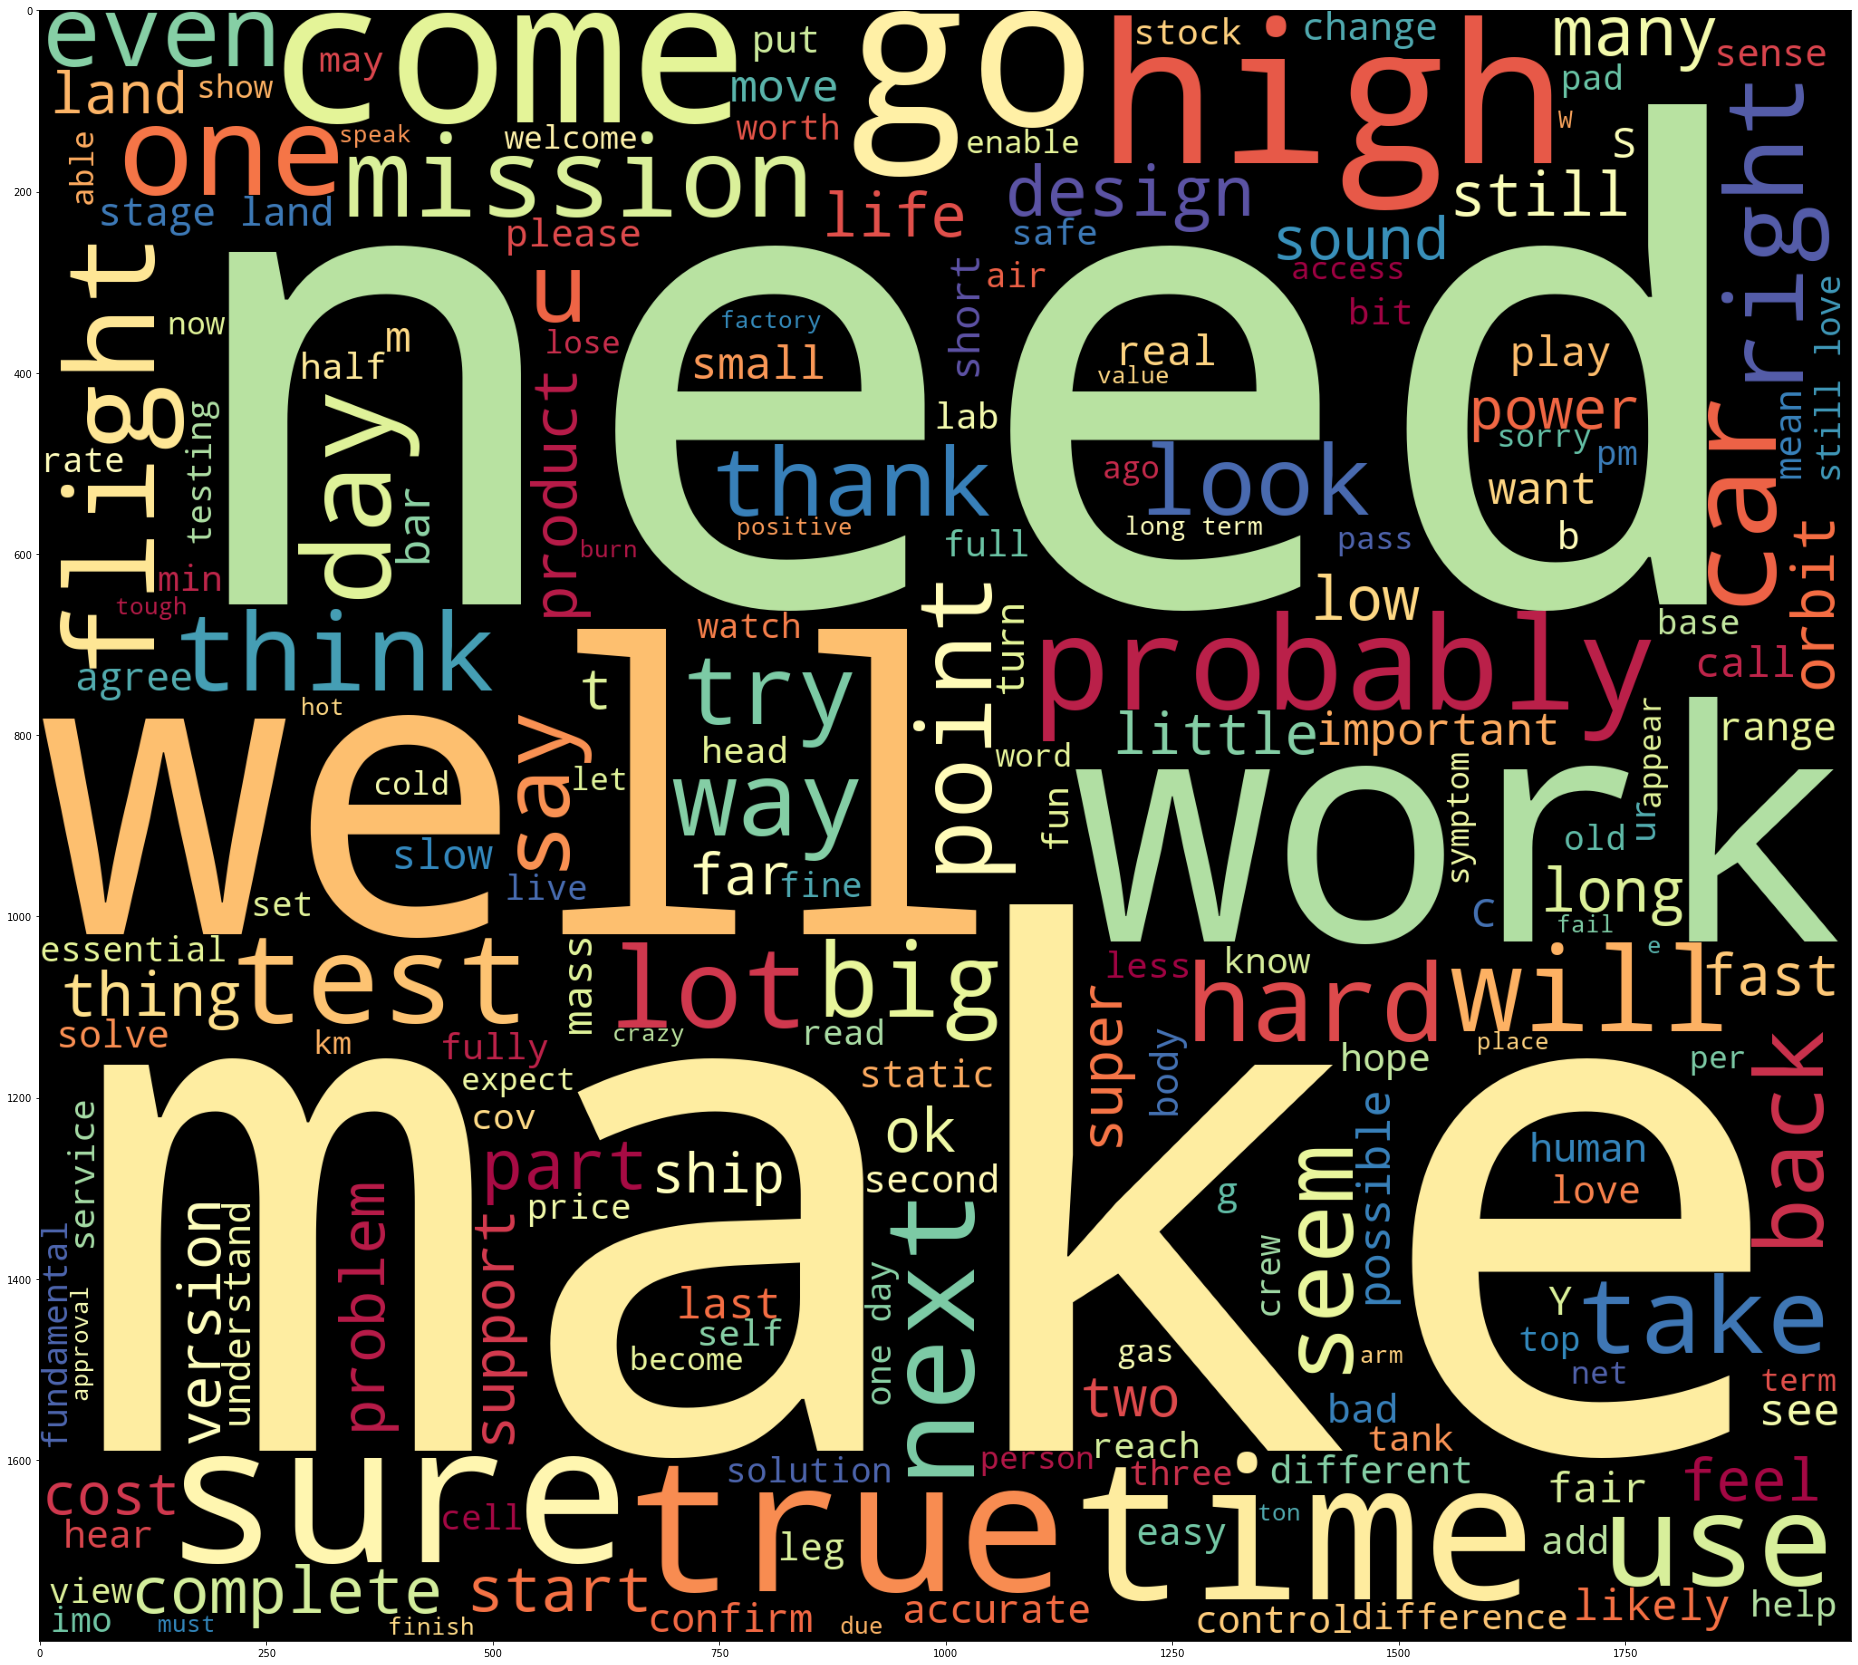

In [112]:
# Positive word cloud
# Choosing the only words which are present in negitive words
neg_word_string = " ".join (in_neg_words)

plt.figure(figsize=(40,30))
wordcloud_pos = WordCloud(
                      background_color='black',
                       colormap='Spectral',
                      width=2000,
                      height=1800
                     ).generate(neg_word_string)
plt.imshow(wordcloud_pos)
plt.show()

In [113]:
len(neg_word_string)

29191

# stop words

In [ ]:
with open("/content/stop.txt", "r", encoding="ISO-8859-1") as stop:
    stop_words = stop.read()
    print(stop_words)

In [115]:
len(stop_words)

3588

In [116]:
in_stop_words = [word for word in lemmas if word in stop_words]
print(in_stop_words[0:40])

["'", 'next', 'have', 'try', 'last', 'now', 'next', 'even', 'all', 'would', 'himself', 'thank', 'indeed', 'definitely', 'real', 'time', 'the', 'likely', 'just', 'just', 'it', "'", 'get', 'real', 'he', 'definitely', 'seem', 'thank', 'please', 'this', 'any', "'", 'give', 'your', 'app', 'first', 'two', 'together', 'one', 'once']


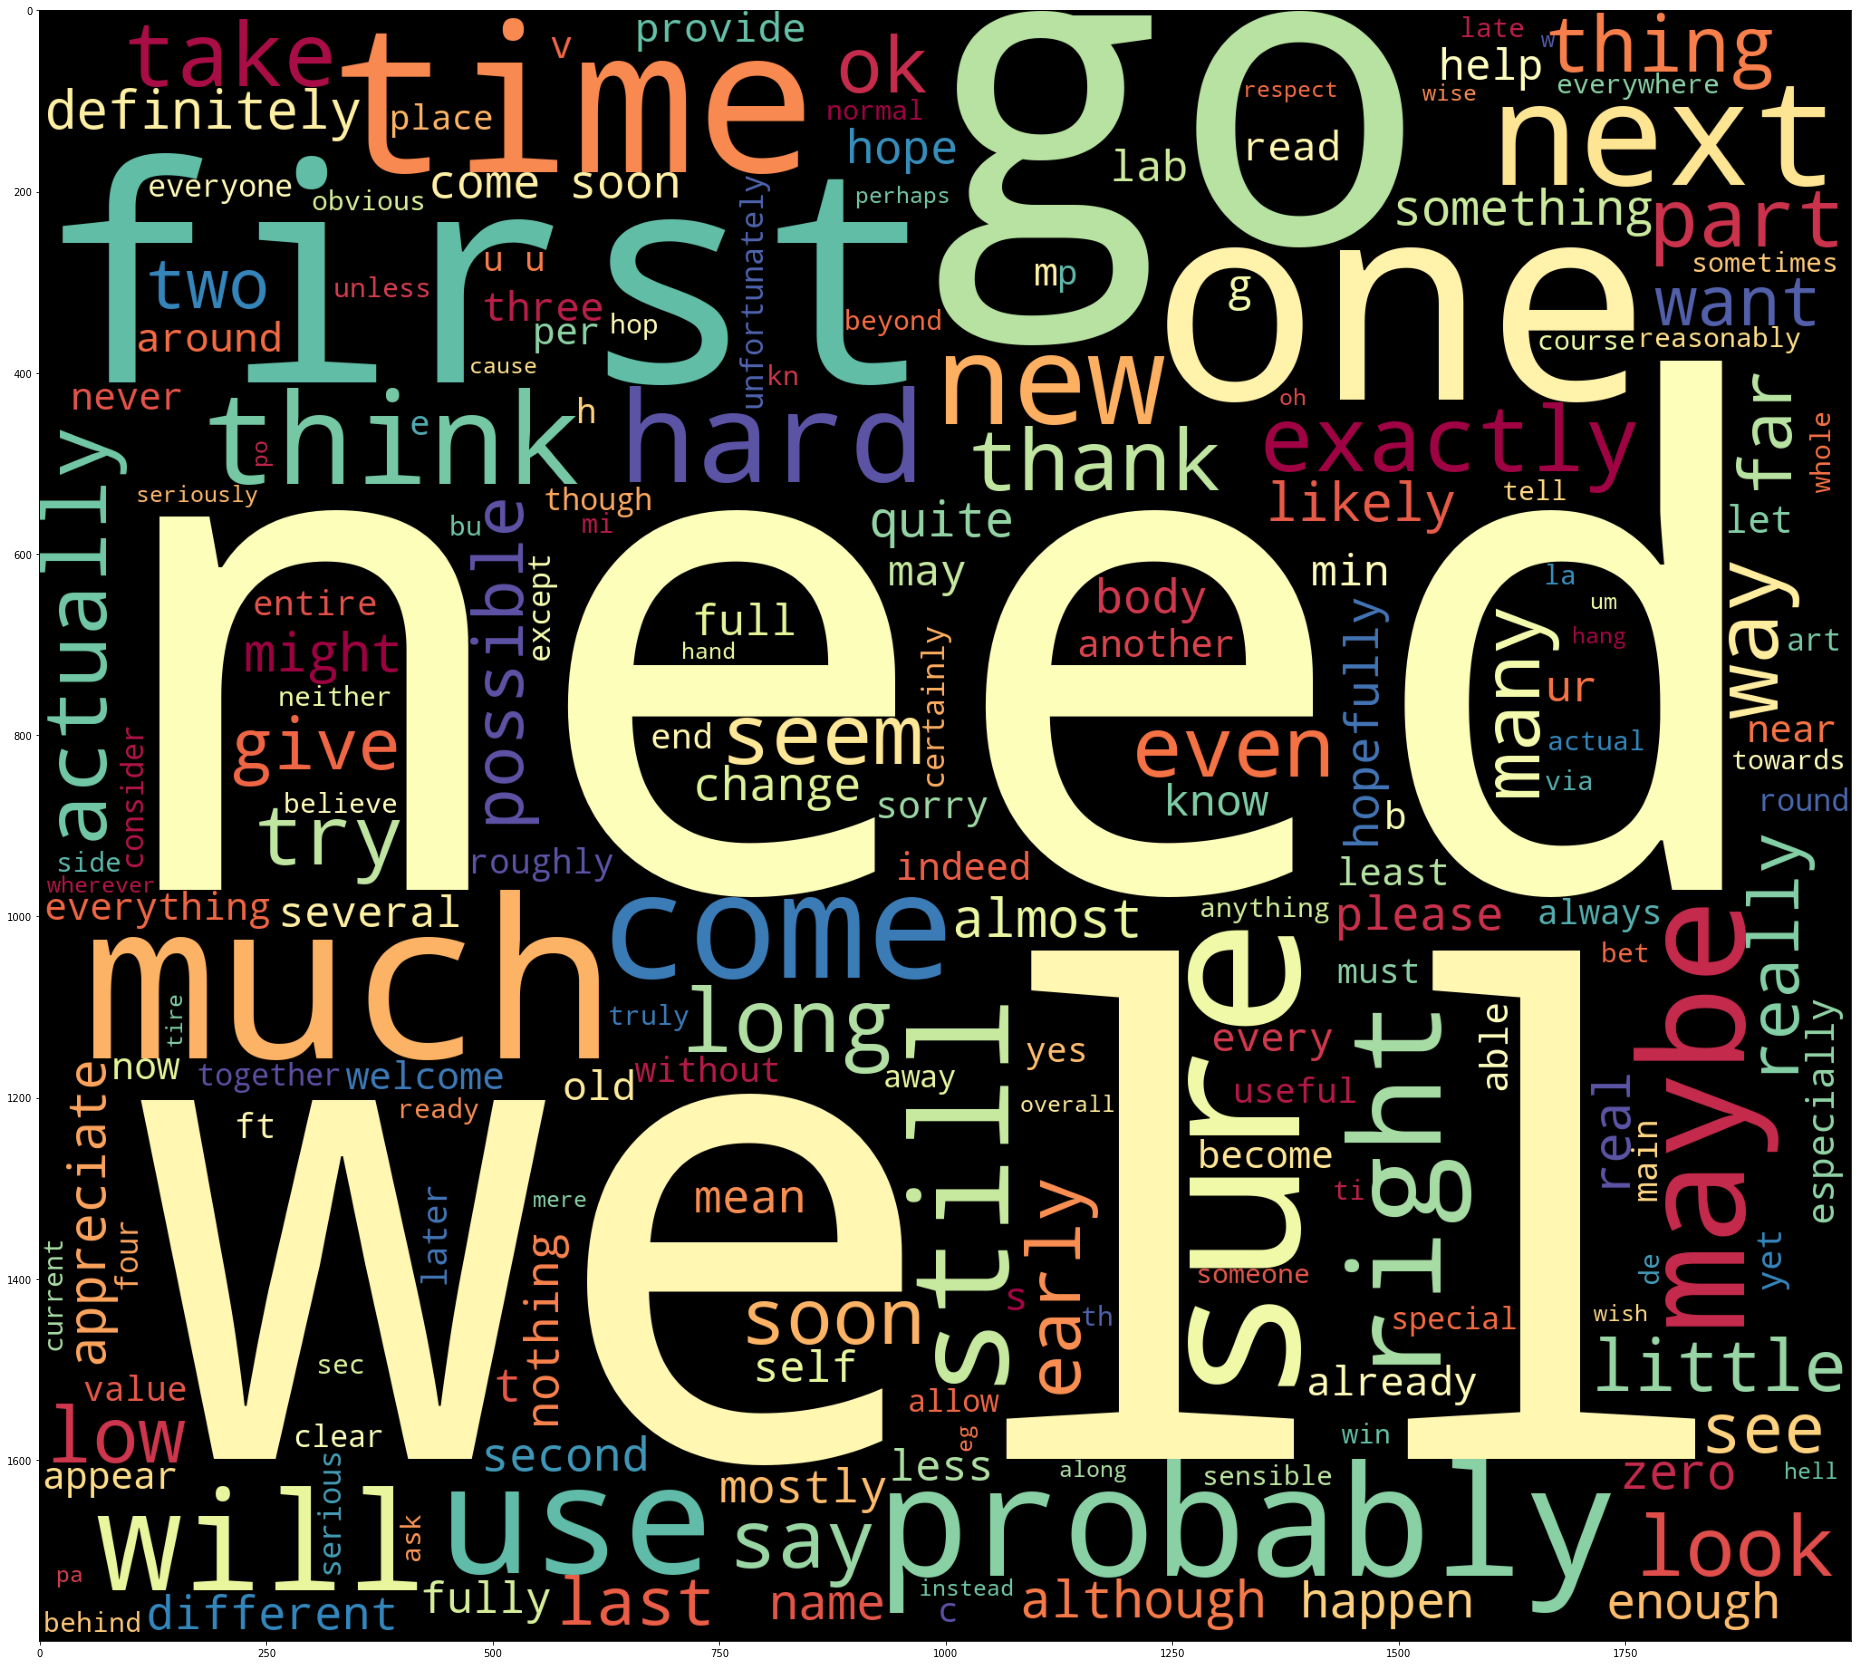

In [117]:
# Positive word cloud
# Choosing the only words which are present in negitive words
stop_word_string = " ".join (in_stop_words)

plt.figure(figsize=(40,30))
wordcloud_pos = WordCloud(
                      background_color='black',
                       colormap='Spectral',
                      width=2000,
                      height=1800
                     ).generate(stop_word_string)
plt.imshow(wordcloud_pos)
plt.show()

In [118]:
len(stop_word_string)

16703